## Импорт библиотек

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [190]:
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Предобработка данных

In [191]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### заменим названия колонок чтобы они были более информативные

In [192]:
students.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parent_status', 'mother_education', 'father_education',
       'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_support', 'family_support', 'paid_math', 'activities', 'nursery',
       'study_time_granular', 'higher', 'internet', 'romantic', 'family_relation',
       'free_time', 'friends_time', 'health', 'absences', 'score']

### функция которая будет использоваться для замены отсутствующих значений

In [193]:
def fill_dataset_na(df):
    for i in df.columns:
        if df[i].dtype in ['float64', 'int64']:
            df[i].fillna(df[i].median(), inplace=True)
            df[i] = df[i].fillna(df[i].median())
        elif df[i].dtype == 'object':
            df[i].fillna(df[i].mode()[0], inplace=True)

### Проведем анализ числовых данных

### возраст


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

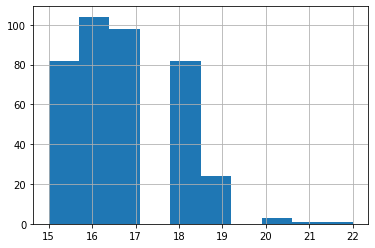

In [194]:
students.age.hist()
students.age.describe()

выбросы отсутствуют

### образование матери

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_education, dtype: float64

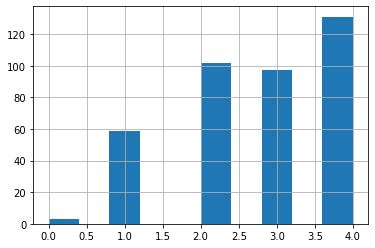

In [195]:
students.mother_education.hist()
students.mother_education.describe()

выбросы отсутствуют

### образование отца

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: father_education, dtype: float64

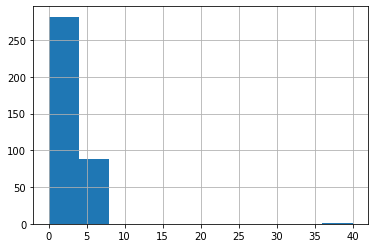

In [196]:
students.father_education.hist()
students.father_education.describe()

тут имеются выбросы, поэтому удалим эти данные

In [197]:
students = students.loc[students.father_education <= 4.0]

### время в пути до школы

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

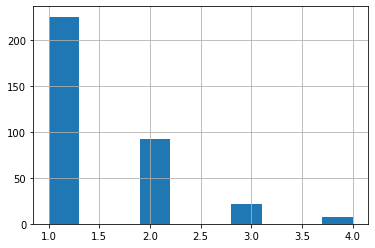

In [198]:
students.travel_time.hist()
students.travel_time.describe()

выбросы отсутствуют

### время на учёбу помимо школы в неделю

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

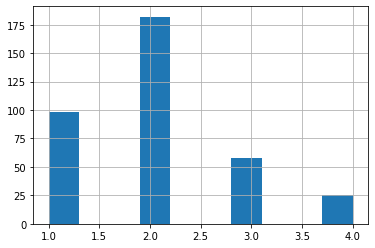

In [199]:
students.study_time.hist()
students.study_time.describe()

выбросы отсутствуют

### количество внеучебных неудач

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

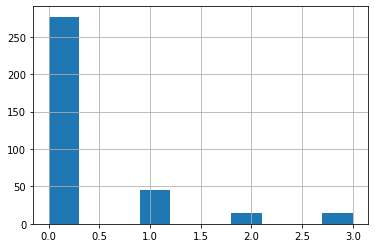

In [200]:
students.failures.hist()
students.failures.describe()

выбросы отсутствуют

### неизвестная переменная

count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: study_time_granular, dtype: float64

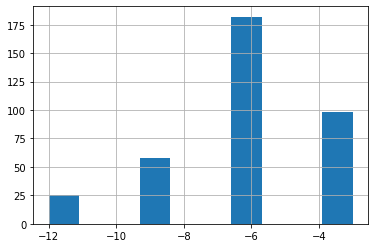

In [201]:
students.study_time_granular.hist()
students.study_time_granular.describe()

### семейные отношения

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relation, dtype: float64

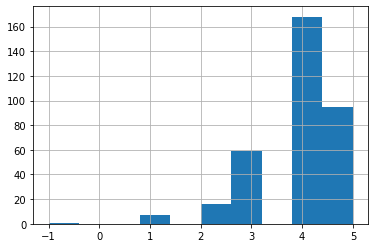

In [202]:
students.family_relation.hist()
students.family_relation.describe()

имеются выбросы, удалим данные с выбросами

In [203]:
students = students.loc[students.family_relation > 0]

### свободное время после школы

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

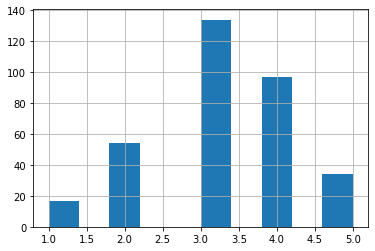

In [204]:
students.free_time.hist()
students.free_time.describe()

выбросы отсутствуют

### проведение времени с друзьями

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: friends_time, dtype: float64

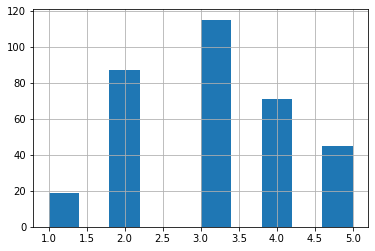

In [205]:
students.friends_time.hist()
students.friends_time.describe()

выбросы отсутствуют

### текущее состояние здоровья

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

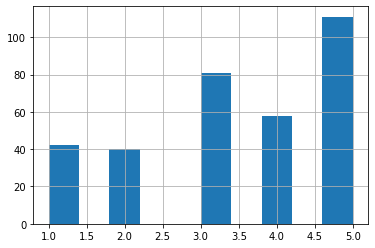

In [206]:
students.health.hist()
students.health.describe()

выбросы отсутствуют

### количество пропущенных занятий

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

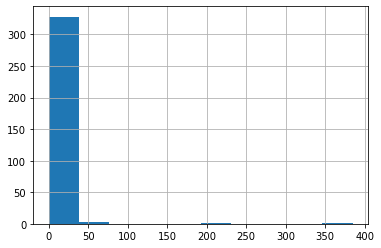

In [207]:
students.absences.hist()
students.absences.describe()

явно видим выбросы, удалим эти данные

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


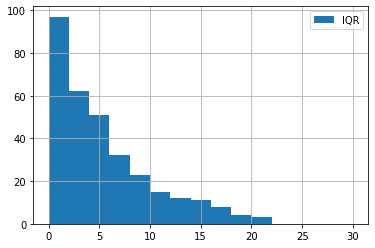

In [208]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.absences.loc[students.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 15, range = (0, 30), label = 'IQR')
 
plt.legend();

In [209]:
students = students.loc[students.absences <= 20.0]

In [210]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               318 non-null    object 
 1   sex                  318 non-null    object 
 2   age                  318 non-null    int64  
 3   address              306 non-null    object 
 4   family_size          298 non-null    object 
 5   parent_status        283 non-null    object 
 6   mother_education     315 non-null    float64
 7   father_education     318 non-null    float64
 8   mother_job           303 non-null    object 
 9   father_job           291 non-null    object 
 10  reason               304 non-null    object 
 11  guardian             290 non-null    object 
 12  travel_time          295 non-null    float64
 13  study_time           313 non-null    float64
 14  failures             301 non-null    float64
 15  school_support       309 non-null    obj

Заполним пустые значения при помощи функции, созданной вначале

In [211]:
fill_dataset_na(students)

In [212]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               318 non-null    object 
 1   sex                  318 non-null    object 
 2   age                  318 non-null    int64  
 3   address              318 non-null    object 
 4   family_size          318 non-null    object 
 5   parent_status        318 non-null    object 
 6   mother_education     318 non-null    float64
 7   father_education     318 non-null    float64
 8   mother_job           318 non-null    object 
 9   father_job           318 non-null    object 
 10  reason               318 non-null    object 
 11  guardian             318 non-null    object 
 12  travel_time          318 non-null    float64
 13  study_time           318 non-null    float64
 14  failures             318 non-null    float64
 15  school_support       318 non-null    obj

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

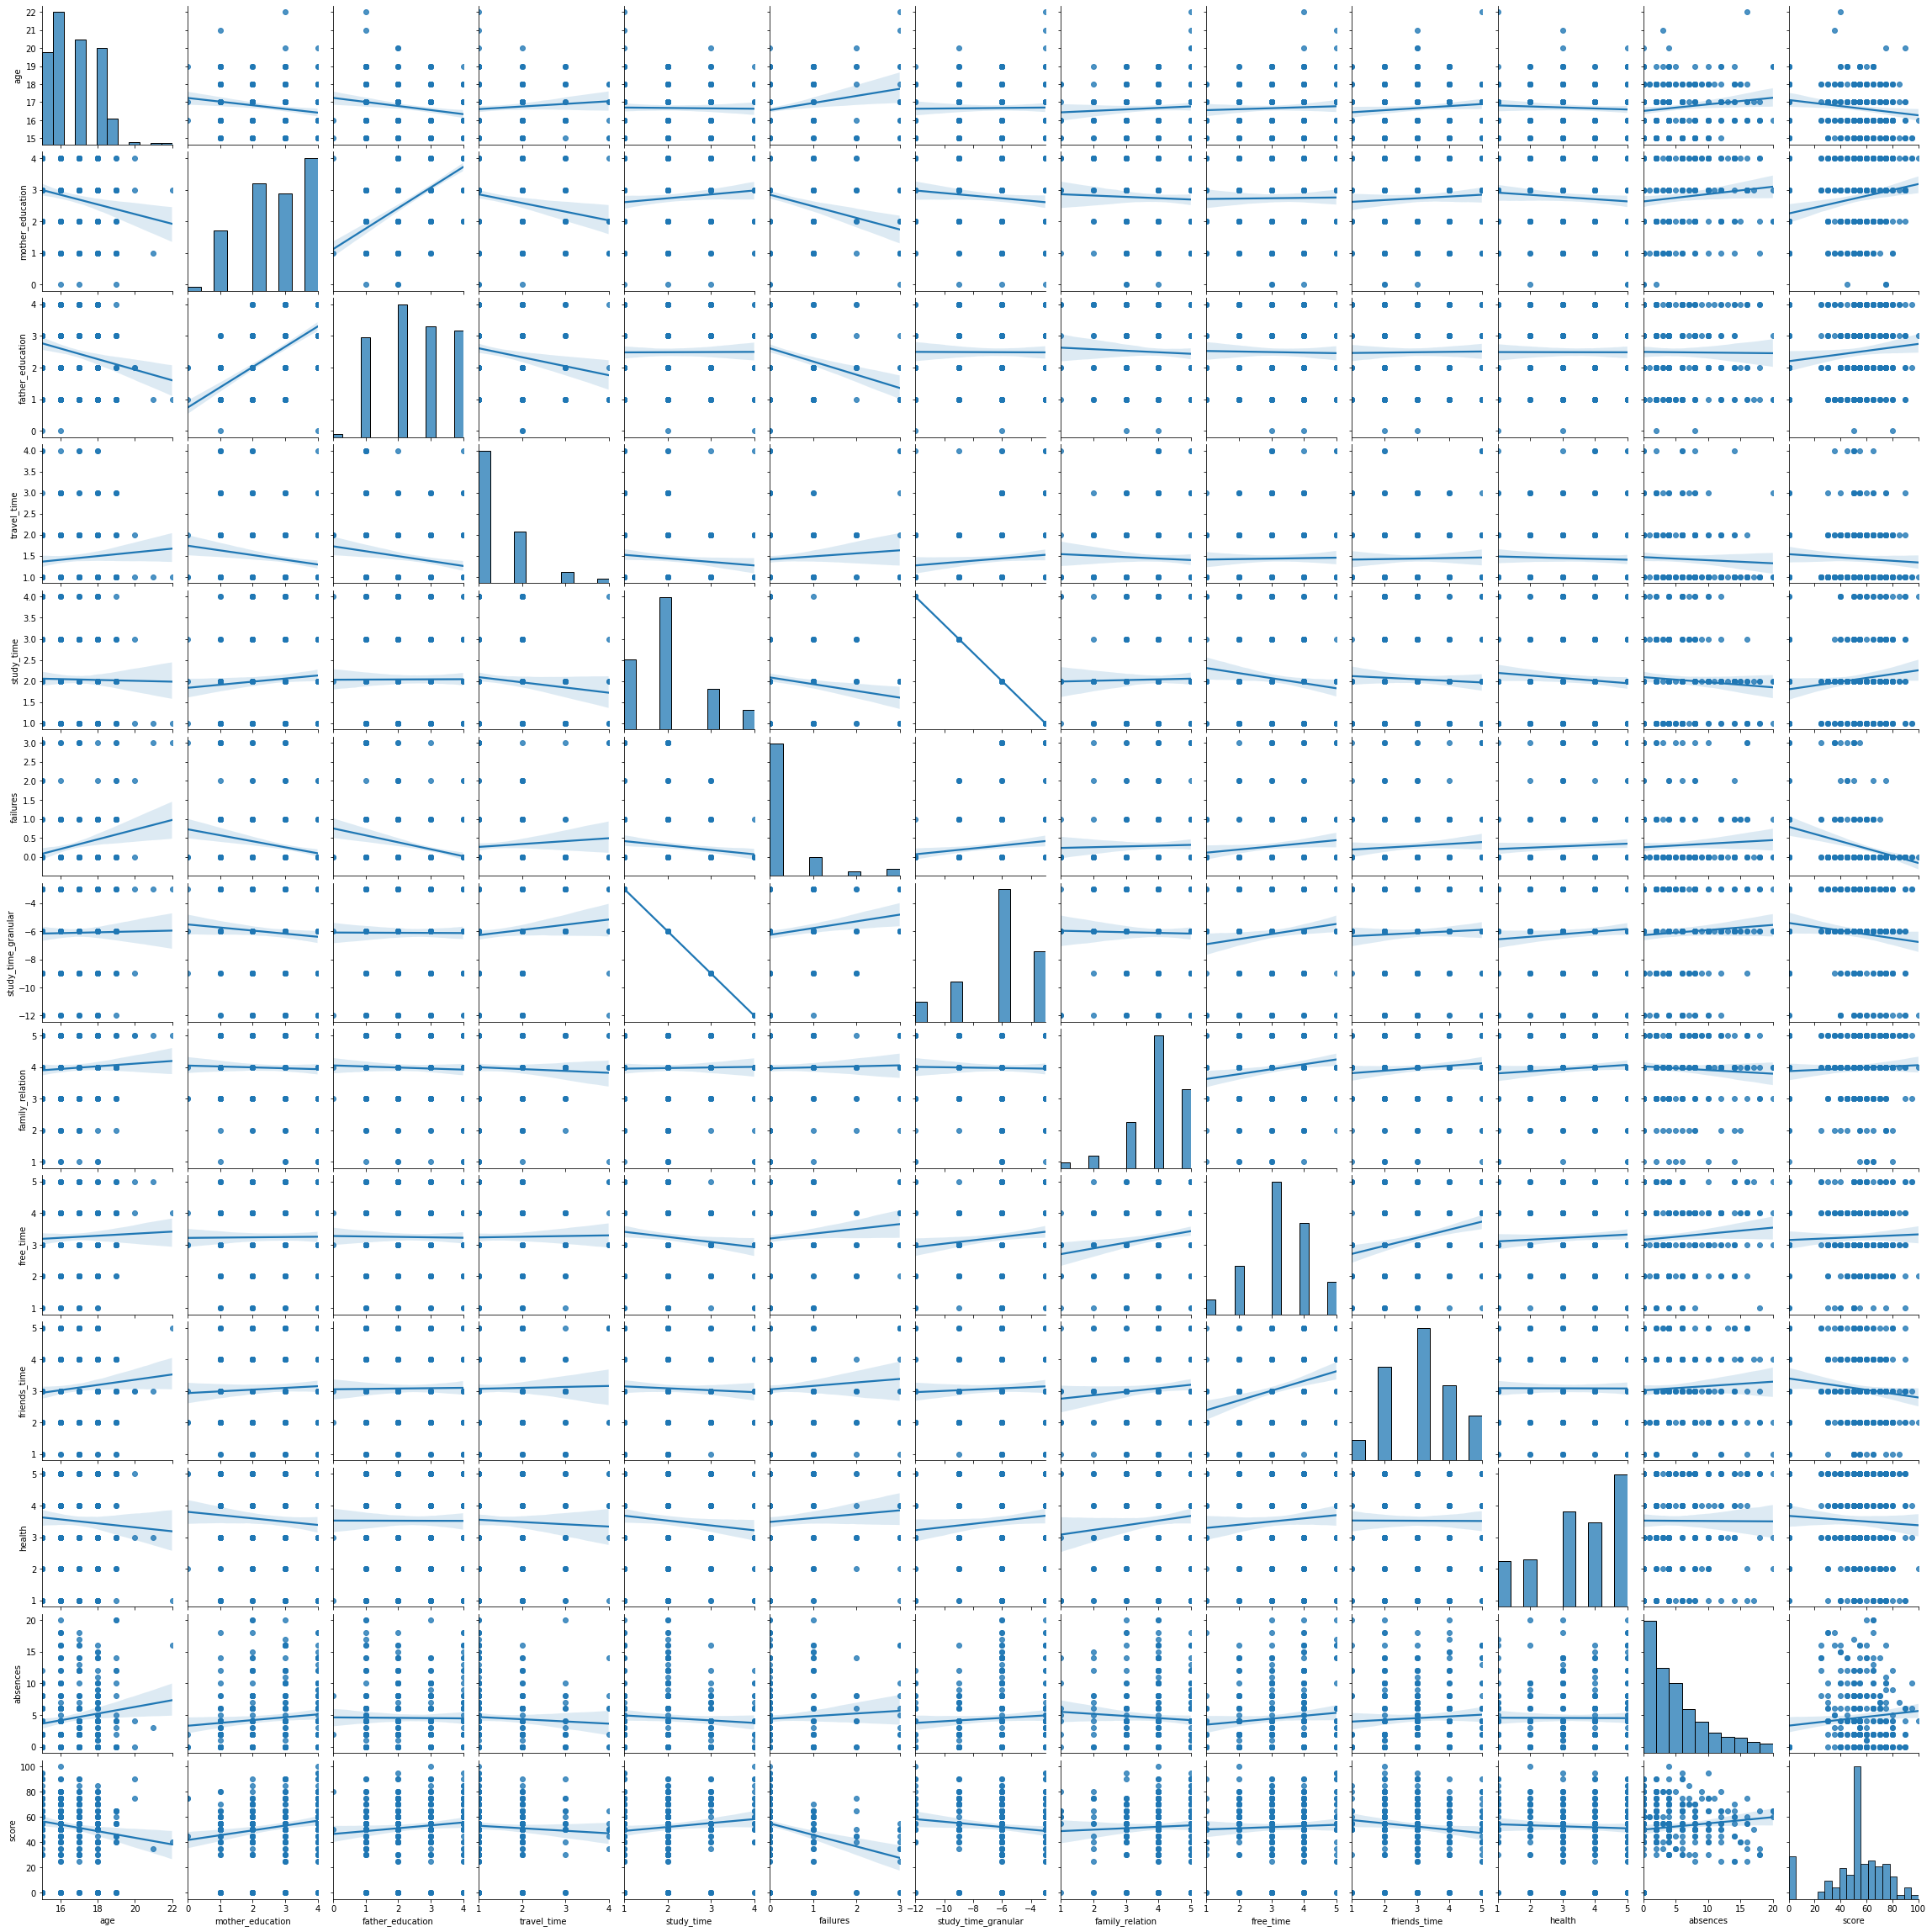

In [213]:
sns.pairplot(students, kind = 'reg')

In [214]:
students.corr()

,age,mother_education,father_education,travel_time,study_time,failures,study_time_granular,family_relation,free_time,friends_time,health,absences,score
age,1.000000,-0.175765,-0.193469,0.079752,-0.015006,0.223053,0.015006,0.058482,0.041972,0.096910,-0.058920,0.138921,-0.148580
mother_education,-0.175765,1.000000,0.643918,-0.174405,0.094728,-0.240242,-0.094728,-0.034349,0.010378,0.055275,-0.084479,0.102355,0.188641
father_education,-0.193469,0.643918,1.000000,-0.181528,0.004017,-0.276113,-0.004017,-0.040042,-0.015423,0.011706,-0.001930,-0.009144,0.111481
travel_time,0.079752,-0.174405,-0.181528,1.000000,-0.101622,0.073918,0.101622,-0.045377,0.015229,0.019230,-0.037032,-0.050647,-0.062685
study_time,-0.015006,0.094728,0.004017,-0.101622,1.000000,-0.135909,-1.000000,0.017982,-0.138718,-0.047853,-0.096761,-0.069129,0.118495
failures,0.223053,-0.240242,-0.276113,0.073918,-0.135909,1.000000,0.135909,0.025136,0.111484,0.073665,0.065291,0.062939,-0.294311
study_time_granular,0.015006,-0.094728,-0.004017,0.101622,-1.000000,0.135909,1.000000,-0.017982,0.138718,0.047853,0.096761,0.069129,-0.118495
family_relation,0.058482,-0.034349,-0.040042,-0.045377,0.017982,0.025136,-0.017982,1.000000,0.167493,0.092476,0.099403,-0.061762,0.046374
free_time,0.041972,0.010378,-0.015423,0.015229,-0.138718,0.111484,0.138718,0.167493,1.000000,0.279670,0.073581,0.095024,0.040514
friends_time,0.096910,0.055275,0.011706,0.019230,-0.047853,0.073665,0.047853,0.092476,0.279670,1.000000,-0.003217,0.061030,-0.124060


Так как переменные study_time и study_time_granular скоррелированы, одну переменную можно исключить. Пусть это будет переменная study_time_granular.

## Анализ номинативных переменных

In [215]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

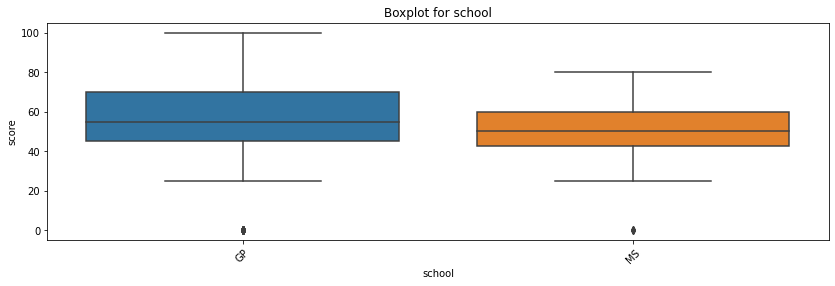

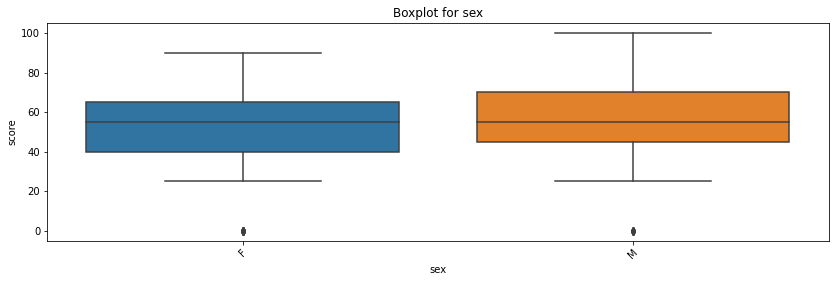

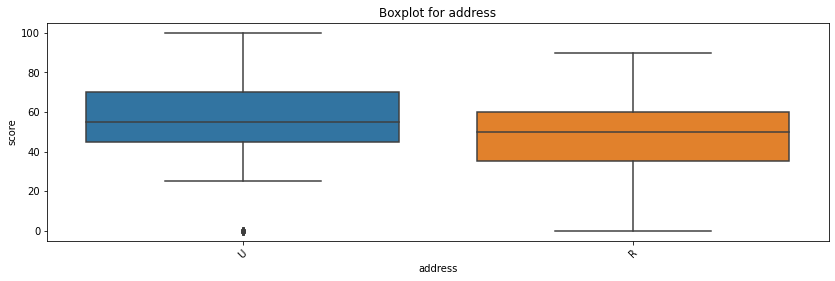

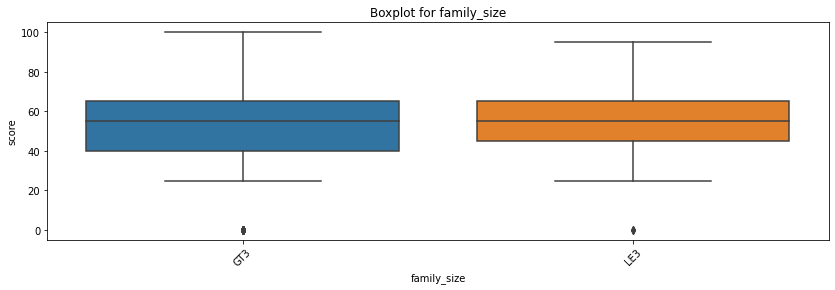

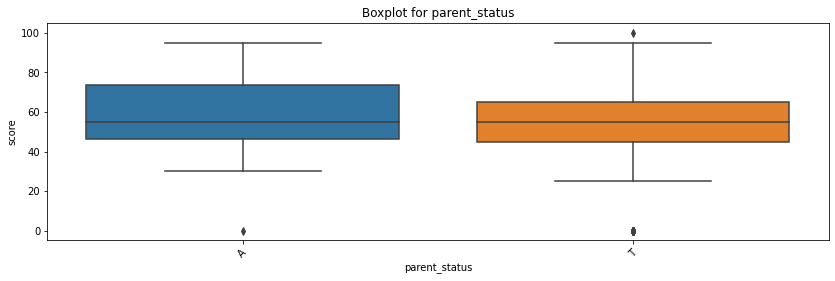

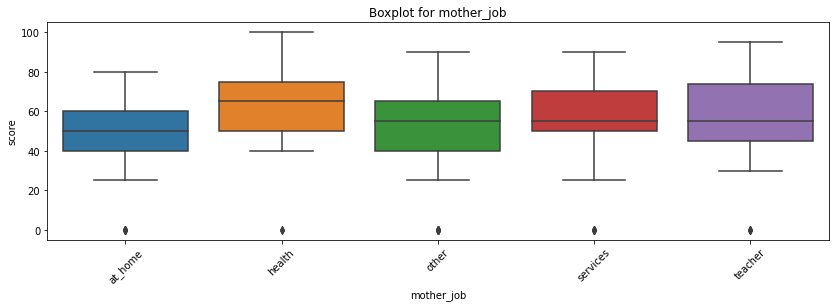

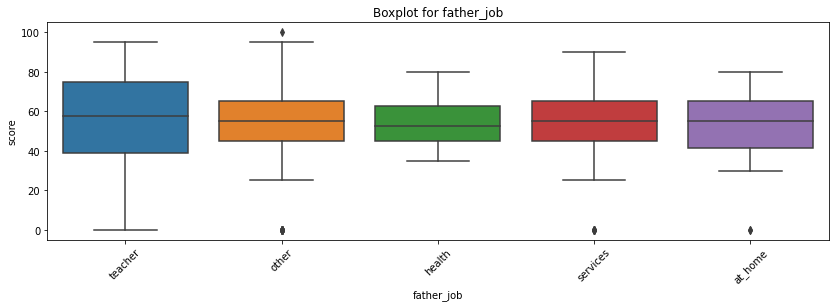

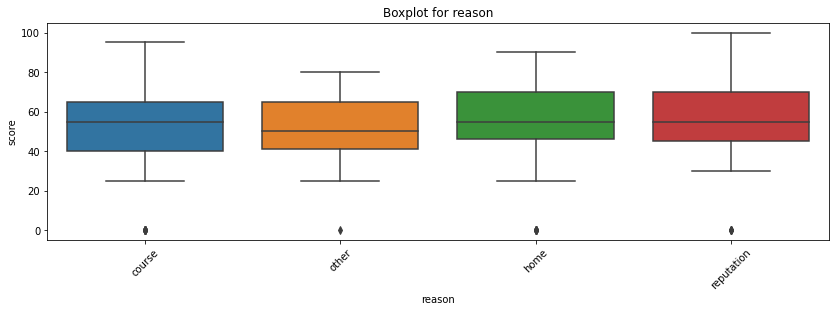

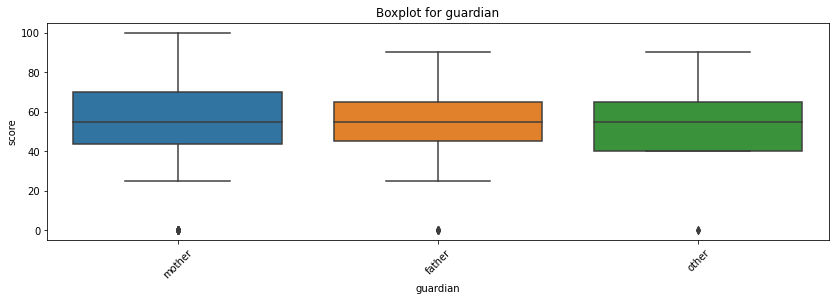

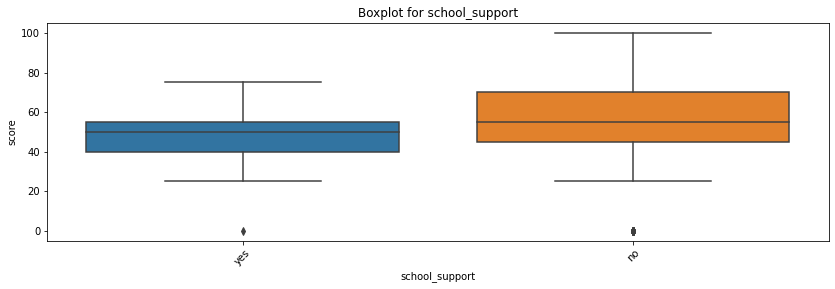

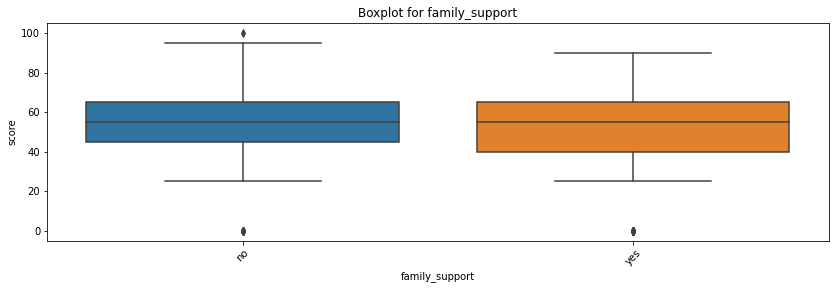

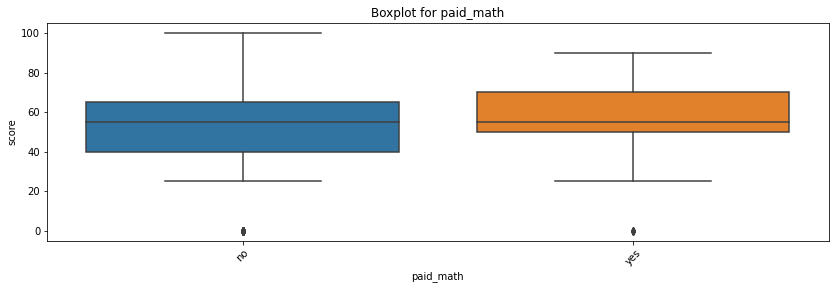

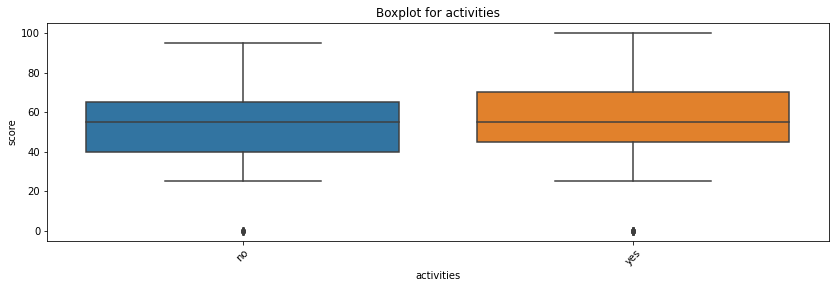

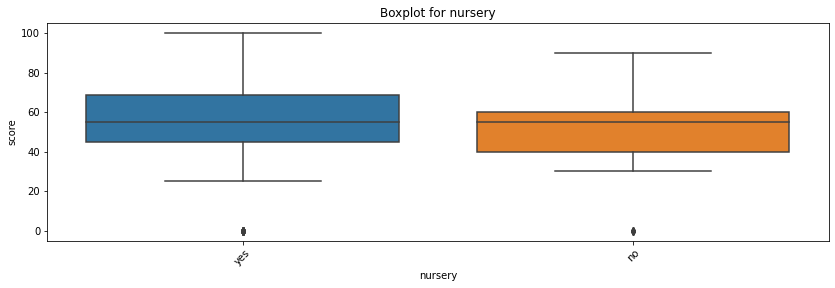

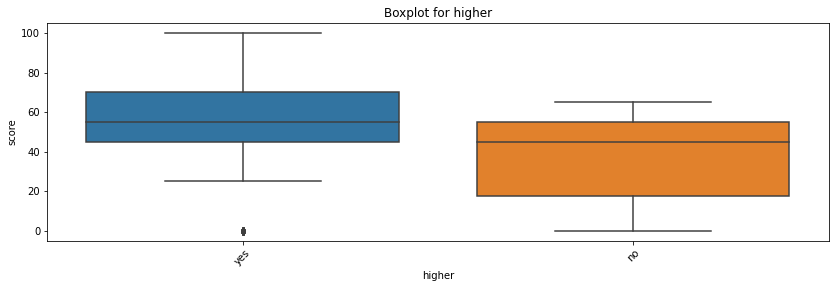

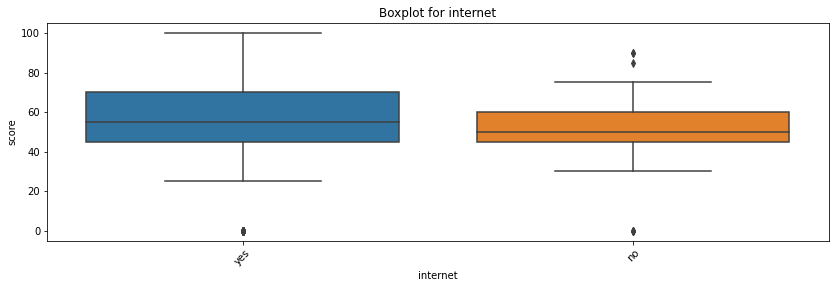

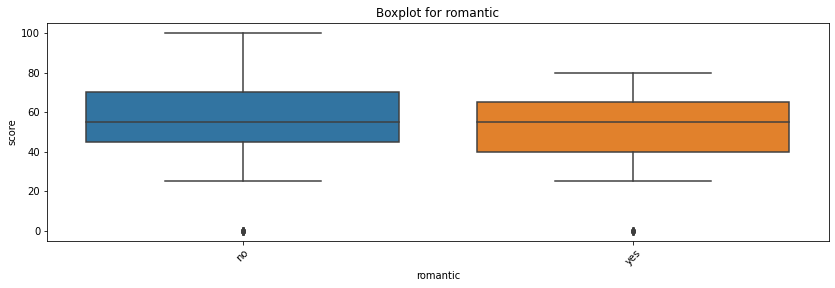

In [216]:
for col in ['school', 'sex', 'address', 'family_size', 'parent_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid_math', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что параметры 'school', 'address', 'mother_job', 'father_job', 'reason', 'school_support', 'paid_math', 'nursery', 'higher', 'internet', могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [219]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [220]:
for col in ['school', 'sex', 'address', 'family_size', 'parent_status', 'mother_job', 'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid_math', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid_math
Найдены статистически значимые различия для колонки higher


Как мы видим, серьёзно отличаются три параметра: address,  paid_math и higher. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: age, mother_education, father_education, travel_time, study_time, failures, family_relation, free_time, friends_time, health, absences, score, address, paid_math, higher